In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.cm import inferno


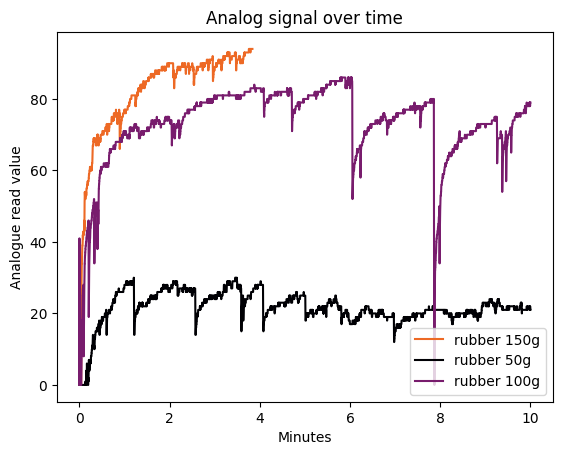

In [92]:
import os
directory = "/its/home/drs25/Documents/GitHub/tactile_hands/Experimental/data/cap100uf/"
all_items = os.listdir(directory)
files = [f for f in all_items if os.path.isfile(os.path.join(directory, f))]

pattern={"velostat":"-.","rubber":"-"}
categories = ["50g", "100g", "150g", "200g"]
n = len(categories)
colours = {cat: inferno(i/(n-1)) for i, cat in enumerate(categories)}
data=[]
labels=[]
for i in range(len(files)):
    if ".csv" in files[i]:
        name=files[i].split("_")
        size=name[2].split(".")[0]
        material=name[1]
        d=pd.read_csv(directory+files[i])
        d['timestamp'] = pd.to_datetime(d['timestamp'])
        data.append(d['value'])
        labels.append(name)
        seconds = d['timestamp'].dt.second.tolist()
        d['elapsed'] = (d['timestamp'] - d['timestamp'].iloc[0]).dt.total_seconds()/60
        plt.plot(d['elapsed'],d['value'],label=material+" "+size,c=colours[size],linestyle=pattern[material])
        #plt.xlabel([i for i in range(0,len(d['timestamp']))],d['timestamp'])

plt.xlabel("Minutes")
plt.ylabel("Analogue read value")
plt.legend(loc="lower right")
plt.title("Analog signal over time")
plt.show()

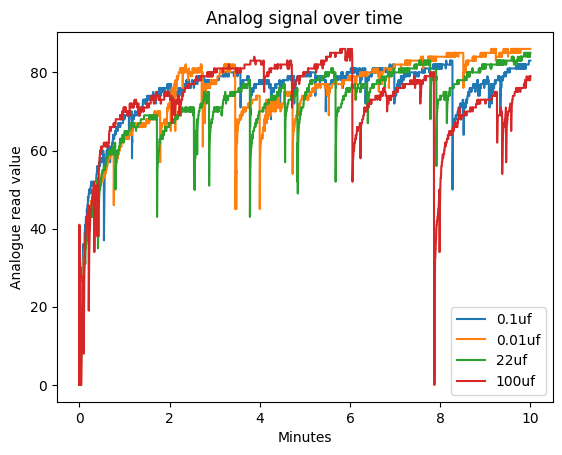

In [88]:
cap0_1=pd.read_csv("/its/home/drs25/Documents/GitHub/tactile_hands/Experimental/data/cap0.1uf/"+"ads7830_rubber_100g.csv")
cap22=pd.read_csv("/its/home/drs25/Documents/GitHub/tactile_hands/Experimental/data/cap22uf/"+"ads7830_rubber_100g.csv")
cap0_01=pd.read_csv("/its/home/drs25/Documents/GitHub/tactile_hands/Experimental/data/cap0.01uf/"+"ads7830_rubber_100g.csv")
cap100=pd.read_csv("/its/home/drs25/Documents/GitHub/tactile_hands/Experimental/data/cap100uf/"+"ads7830_rubber_100g.csv")

cap0_1['timestamp'] = pd.to_datetime(cap0_1['timestamp'])
cap22['timestamp'] = pd.to_datetime(cap22['timestamp'])
cap0_01['timestamp'] = pd.to_datetime(cap0_01['timestamp'])
cap100['timestamp'] = pd.to_datetime(cap100['timestamp'])

seconds = cap0_1['timestamp'].dt.second.tolist()
cap0_1['elapsed'] = (cap0_1['timestamp'] - cap0_1['timestamp'].iloc[0]).dt.total_seconds()/60
plt.plot(cap0_1['elapsed'],cap0_1['value'],label="0.1uf")

seconds = cap0_01['timestamp'].dt.second.tolist()
cap0_01['elapsed'] = (cap0_01['timestamp'] - cap0_01['timestamp'].iloc[0]).dt.total_seconds()/60
plt.plot(cap0_01['elapsed'],cap0_01['value'],label="0.01uf")

seconds = cap22['timestamp'].dt.second.tolist()
cap22['elapsed'] = (cap22['timestamp'] - cap22['timestamp'].iloc[0]).dt.total_seconds()/60
plt.plot(cap22['elapsed'],cap22['value'],label="22uf")

seconds = cap100['timestamp'].dt.second.tolist()
cap100['elapsed'] = (cap100['timestamp'] - cap100['timestamp'].iloc[0]).dt.total_seconds()/60
plt.plot(cap100['elapsed'],cap100['value'],label="100uf")

plt.xlabel("Minutes")
plt.ylabel("Analogue read value")
plt.legend(loc="lower right")
plt.title("Analog signal over time")
plt.show()